# California housing prices


### The purpose of this project is to build a model of housing prices in California using the California centrus dataset (data from 1990). This dataset has metrics for each block group (district), which is the smallest geoghaphical unit for which data was published.
### The model should learn from this data and be able to predict the median housing price in any district, given all the other metrics.

### Main steps that will be covered:
1. __ Frame the problem and look at the big picture __ 
2. __ Get the data __ 
3. __ Discover and visualize the data to gain insights__ 
4. __ Prepare the data for ML algorithms__ 
5. __ Select a model and traint it__ 
6. __ Fine-tune the model__ 
7. __ Present the solution__ 
8. __ Launch, monitor, and mantain the system__ 


## 1. Frame the problem and look at the big picture

###    1. 1 Define the objective in business terms:
__The output of the model will be used as input for another ML system, along with other signals. The downstream system will determine wether it is worth investing in a given area or not. __

###     1. 2 What are the current solutions (if any)?
__The district housing prices are estimated manually by experts. The process is expensive and time consuming, and the estimates are not great (off by more than 10%).__


### 1. 3 How should you frame the problem (supervised/unsupervised, batch/online etc)?
__This problem can be solved with a supervised learning algorithm as the data is labeled. Moreover, the algorithm can be a multivariate regression since we are asked to make a prediction. As it is not required to rapidly adapt the algorithm to new changes, batch learning can be used.__

### 1. 4 How the performance should be measured?
__We can use RMSE(Root Mean Squared Error aka l2 norm), with a higher weight for large errors. __






In [1]:
from IPython.display import Math
Math(r'RMSE(X, h) = \sqrt{\frac1m \sum_{i=1}^m (h(x^{(i)}) - y^{(i)})^{2}}')

<IPython.core.display.Math object>

### 1. 4 Check the assumptions

## 2. Get the data

### 2.1 Download the data

In [2]:
import os
import tarfile
from six.moves import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_ARCHIVE = "housing.tgz"
HOUSING_URL = os.path.join(DOWNLOAD_ROOT, "datasets/housing/", HOUSING_ARCHIVE)

HOUSING_SAVE_PATH = os.path.join("datasets", "housing")

def fetch_data(data_url=HOUSING_URL, save_path=HOUSING_SAVE_PATH, file_name=HOUSING_ARCHIVE):
    if not os.path.isdir(save_path):
        os.makedirs(save_path)
    
    file_path = os.path.join(save_path, file_name)
    urllib.request.urlretrieve(data_url, file_path)    
    archived_data = tarfile.open(file_path)
    archived_data.extractall(path=save_path)
    archived_data.close()
    
    

In [3]:
fetch_data()

In [4]:
import pandas as pd

HOUSING_DATA = "housing.csv"

def load_data(path=HOUSING_SAVE_PATH, file_name=HOUSING_DATA):
    complete_path=os.path.join(path, file_name)
    return pd.read_csv(complete_path)

data = load_data()

### 2.2 Take a quick look at the data


In [5]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


#### Note that the dataset has 20640 entries (fairly small dataset), the "total_bedrooms" attribute has only 20433 non-null values, and that the ocean_proximity attribute is not a numerical one

In [7]:
data['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [8]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


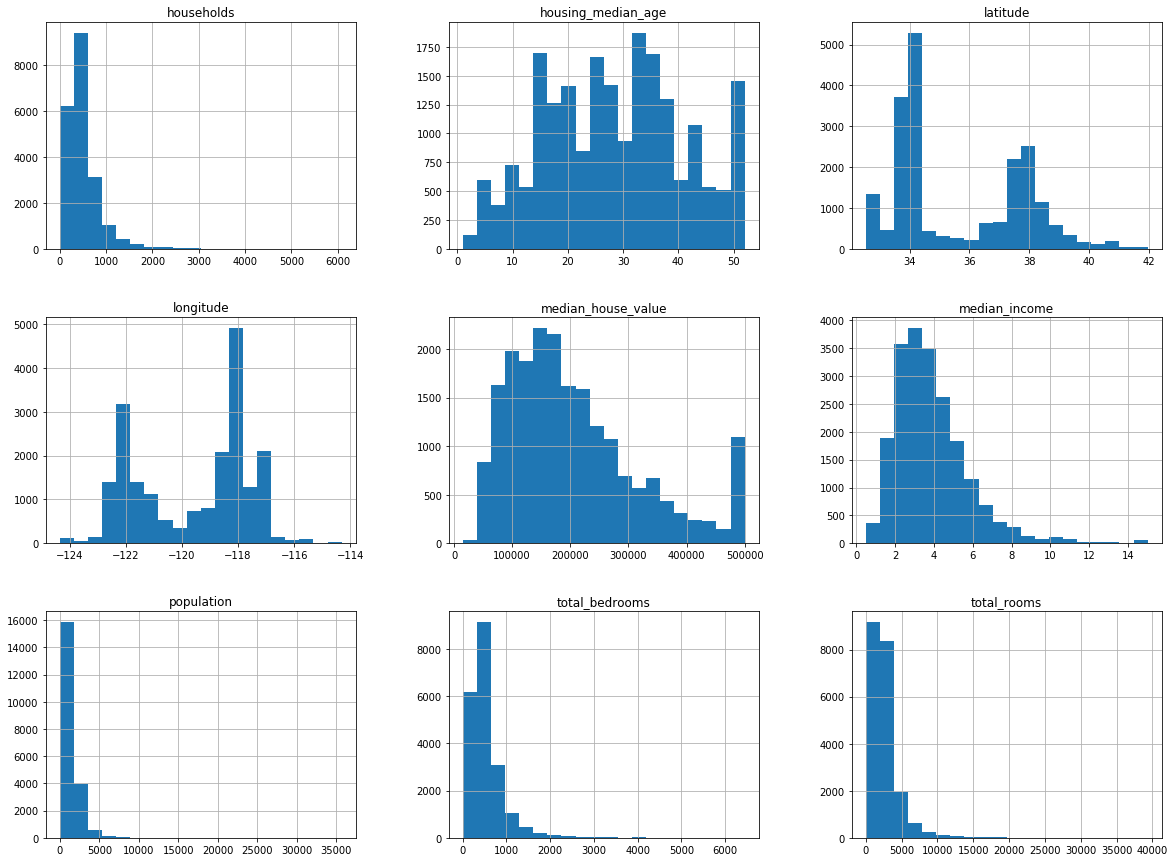

In [9]:
%matplotlib inline

import matplotlib.pyplot as plt

data.hist(bins=20, figsize=(20, 15))
plt.show()


#### Note that: 
__1. The median income attribute does not look like it is expressed in US dollars. After checking with the team that collected the data, you find that the data has been scaled and capped at 15 for higher median incomes, and at 0.5 for lower median incomes.__
<br>
__2. The housing median age and the median house value were also capped. As the later one is the target attribute, the algorithm may learn that the prices never go beyond that limit. If this is a problem for the final result, there are mainly two options: collect proper labels for the capped data or remove those observations__
<br>
__3. The attributes have very different scales__
<br>
__4. Many histograms are tail heavy. This may make it a bit harder for some ML algorithms to detect patterns.__

### 2.2 Create a test set

#### Purely random sampling methods are generally fine if the dataset is large enough, but if not, there is a risk of introducing a sampling bias. To avoid this, we will use a stradified sampling (divide in homogeneous subgroups).
__Supose the experts suggested that the median income is a very important attribute to predict the median housing prices. We want to make sure that the test set is representative of the various categories of incomes in the whole dataset.__

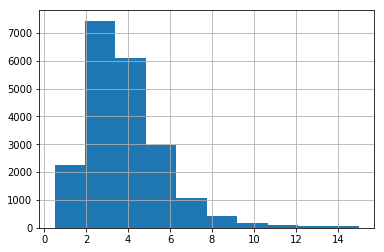

In [10]:
data['median_income'].hist()

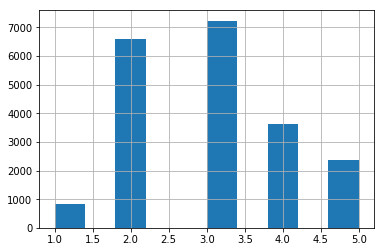

In [11]:
import numpy as np

# divide by 1.5 to limit the number of income categories
data['income_category']= np.ceil(data['median_income']/1.5)

# label what is above five as five
data['income_category'].where(data['income_category'] < 5, 5.0, inplace=True)
data['income_category'].hist()


In [12]:
data["income_category"].value_counts()

3.0    7236
2.0    6581
4.0    3639
5.0    2362
1.0     822
Name: income_category, dtype: int64

In [13]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(data, data['income_category']):
    strat_train_set = data.loc[train_index]
    strat_test_set = data.loc[test_index]

In [14]:
# check the size
strat_train_set['income_category'].value_counts() / len(strat_train_set)

3.0    0.350594
2.0    0.318859
4.0    0.176296
5.0    0.114402
1.0    0.039850
Name: income_category, dtype: float64

In [15]:
strat_test_set['income_category'].value_counts() / len(strat_test_set)

3.0    0.350533
2.0    0.318798
4.0    0.176357
5.0    0.114583
1.0    0.039729
Name: income_category, dtype: float64

In [16]:
# get the data back to its original state

for set_ in (strat_train_set, strat_test_set):
    set_.drop('income_category', axis=1, inplace=True)
    

## 3. Discover and visualize the data to gain insights

In [17]:
# use a copy of the train set to avoid harming the original data
train_set_copy = strat_train_set.copy()

### 3.1 Visualizing geographical data

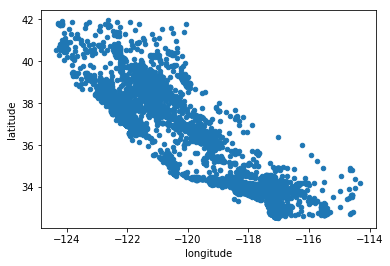

In [18]:
train_set_copy.plot(kind='scatter', x='longitude', y='latitude')

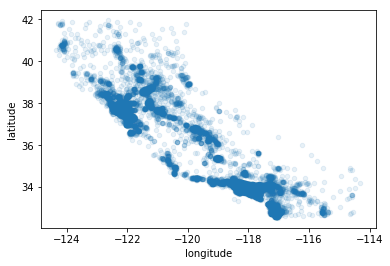

In [19]:
# add alpha paramter to make easier the visualtions of high density points
train_set_copy.plot(kind='scatter', x='longitude', y='latitude', alpha=0.1)

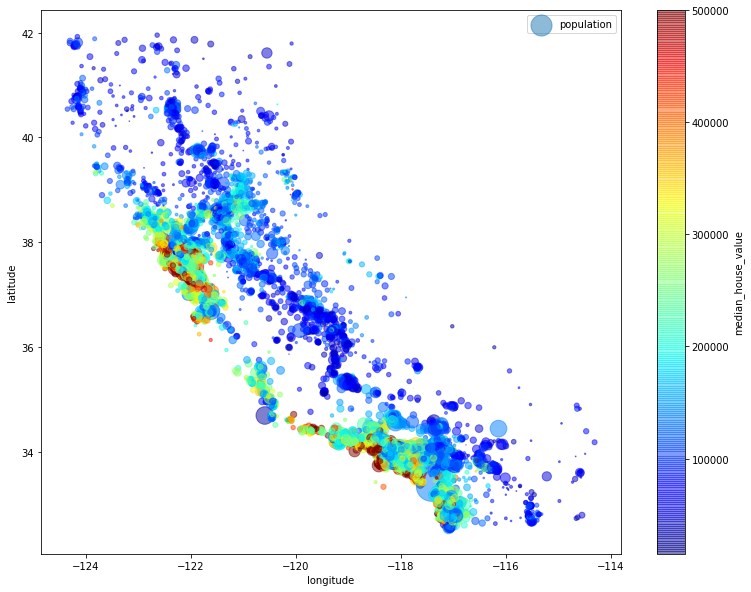

In [20]:
# s parameter will represent the population as the radius
# c parameter will represent the price

train_set_copy.plot(kind='scatter', x='longitude', y='latitude', alpha=0.5, 
                    s=train_set_copy['population']/40, label='population', figsize=(13,10),
                   c='median_house_value', cmap=plt.get_cmap('jet'), colorbar=True, sharex=False)

plt.legend()

#### Note that his graphs shows that the prices are very much related to the location (close to the ocean), and the population density.
__It may be useful to use a clustering algorithm to detect the main clusters and add a new feature that represents the distance from the center of the cluster.__


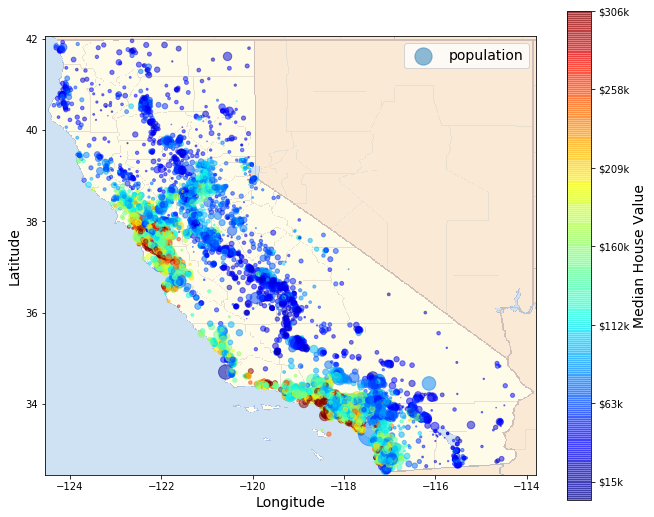

In [52]:
import matplotlib.image as mpimg
california_img=mpimg.imread('./images/california.png')

ax = train_set_copy.plot(kind='scatter', x='longitude', y='latitude', alpha=0.5, 
                    s=train_set_copy['population']/60, label='population', figsize=(11,9),
                    c='median_house_value', cmap=plt.get_cmap('jet'), colorbar=False, sharex=False)

plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5,
           cmap=plt.get_cmap("jet"))

plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

prices = train_set_copy["median_house_value"]
tick_values = np.linspace(prices.min(), prices.max(), 11)
cbar = plt.colorbar()
cbar.ax.set_yticklabels(["$%dk"%(round(v/1000)) for v in tick_values], fontsize=10)
cbar.set_label('Median House Value', fontsize=14)

plt.legend(fontsize=14)
plt.show()


### 3.2 Looking for correlations


__Since the dataset is not too large, we can easly compute the standard correlation coefficient between every pair of attributes.__

In [27]:
correlation_matrix = train_set_copy.corr()
print(correlation_matrix)

                    longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.924478           -0.105848     0.048871   
latitude            -0.924478  1.000000            0.005766    -0.039184   
housing_median_age  -0.105848  0.005766            1.000000    -0.364509   
total_rooms          0.048871 -0.039184           -0.364509     1.000000   
total_bedrooms       0.076598 -0.072419           -0.325047     0.929379   
population           0.108030 -0.115222           -0.298710     0.855109   
households           0.063070 -0.077647           -0.306428     0.918392   
median_income       -0.019583 -0.075205           -0.111360     0.200087   
median_house_value  -0.047432 -0.142724            0.114110     0.135097   

                    total_bedrooms  population  households  median_income  \
longitude                 0.076598    0.108030    0.063070      -0.019583   
latitude                 -0.072419   -0.115222   -0.077647      -0.075205   
housing_

In [29]:
correlation_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

In [21]:
#todo: add aditional doc steps 